In [1]:
# The C2QA pacakge is currently not published to PyPI. 
# To use the package locally, add the C2QA repository's root folder to the path prior to importing c2qa.
import os
import sys
module_path = os.path.abspath(os.path.join("../.."))
if module_path not in sys.path:
    sys.path.append(module_path)

# Cheat to get MS Visual Studio Code Jupyter server to recognize Python venv
module_path = os.path.abspath(os.path.join("../../venv/Lib/site-packages"))
if module_path not in sys.path:
    sys.path.append(module_path)

## Plotting Wigner functions
The following is an example of using the c2qa.util module to plot Wigner functions for a QisKit StateVector.

In [2]:
import c2qa
import qiskit

### Initialize Fock state to zero

In [3]:
qmr0 = c2qa.QumodeRegister(num_qumodes=1, num_qubits_per_mode=2)
qr0 = qiskit.QuantumRegister(size=1)
circuit0 = c2qa.CVCircuit(qmr0, qr0)

# Initialize your qubit (should have no effect on Fock state Wigner function)
circuit0.initialize([1,0], qr0[0])
# circuit0.initialize([0,1], qr0[0])

# Initialize the qumode to a zero Fock sate
circuit0.cv_initialize(0, qmr0[0])

# ... Your circtuit here ...

state0 = c2qa.util.simulate(circuit0)
print(state0)

Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))


In [4]:
# c2qa.util.plot_wigner_function() will perform a partial trace to separate the qumode from the qubit state for you, the call below is to log its output as an example.
print(c2qa.util.cv_partial_trace(circuit0, state0))

DensityMatrix([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
               [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
               [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
               [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]],
              dims=(2, 2))


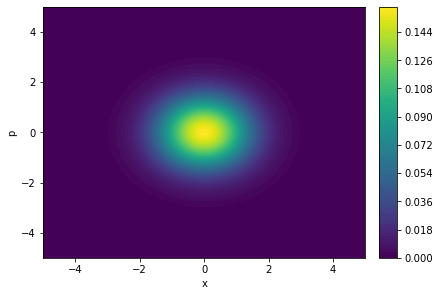

In [5]:
c2qa.util.plot_wigner_fock_state(circuit0, state0)

### Initialize Fock state to one

In [6]:
qmr1 = c2qa.QumodeRegister(num_qumodes=1, num_qubits_per_mode=2)
qr1 = qiskit.QuantumRegister(size=1)
circuit1 = c2qa.CVCircuit(qmr1, qr1)

# Initialize your qubit (should have no effect on Fock state Wigner function)
circuit1.initialize([1,0], qr1[0])
# circuit1.initialize([0,1], qr1[0])

# Initialize the qumode to a one Fock sate
circuit1.cv_initialize(1, qmr1[0])

# ... Your circtuit here ...

state1 = c2qa.util.simulate(circuit1)
print(state1)

Statevector([4.26642159e-17+0.j, 1.00000000e+00+0.j, 0.00000000e+00+0.j,
             0.00000000e+00+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j,
             0.00000000e+00+0.j, 0.00000000e+00+0.j],
            dims=(2, 2, 2))


In [7]:
# c2qa.util.plot_wigner_function() will perform a partial trace to separate the qumode from the qubit state for you, the call below is to log its output as an example.
print(c2qa.util.cv_partial_trace(circuit1, state1))

DensityMatrix([[1.82023532e-33+0.j, 4.26642159e-17+0.j,
                0.00000000e+00+0.j, 0.00000000e+00+0.j],
               [4.26642159e-17+0.j, 1.00000000e+00+0.j,
                0.00000000e+00+0.j, 0.00000000e+00+0.j],
               [0.00000000e+00+0.j, 0.00000000e+00+0.j,
                0.00000000e+00+0.j, 0.00000000e+00+0.j],
               [0.00000000e+00+0.j, 0.00000000e+00+0.j,
                0.00000000e+00+0.j, 0.00000000e+00+0.j]],
              dims=(2, 2))


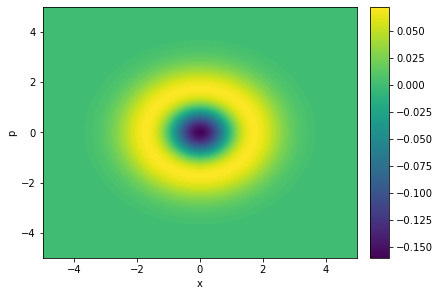

In [8]:
c2qa.util.plot_wigner_fock_state(circuit1, state1)